## Bloomberg & CSI Financial Data Project

### File prep

In [1]:
# let's start with specifying the paths of data files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid") 

# data set files
# Brent Crude
csi_lco_brent = pd.read_csv ("C:/Stuff/Self Development/Data Studies/Personal Projects/Brent & CSI Financial Data/Unpacked/csidata/LCO.csv")
bbg_co_brent = pd.read_csv ("C:/Stuff/Self Development/Data Studies/Personal Projects/Brent & CSI Financial Data/Unpacked/bbg/CO.csv")

# e-mini S&P 500 Index
csi_es_snp_index = pd.read_csv ("C:/Stuff/Self Development/Data Studies/Personal Projects/Brent & CSI Financial Data/Unpacked/csidata/ES.csv")
bbg_es_snp_index = pd.read_csv ("C:/Stuff/Self Development/Data Studies/Personal Projects/Brent & CSI Financial Data/Unpacked/bbg/ES.csv")


### Summary statistics for each vendor's datasets and critical observations regarding the quality and completeness of the data. 

#### CSI LCO (Brent Crude)

In [2]:
# let's check the dataset info
csi_lco_brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54201 entries, 0 to 54200
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        54201 non-null  object 
 1   symbol      54201 non-null  object 
 2   open        54185 non-null  float64
 3   high        54185 non-null  float64
 4   low         54185 non-null  float64
 5   close       54185 non-null  float64
 6   volume      54201 non-null  int64  
 7   oi          54201 non-null  int64  
 8   ref1        54201 non-null  int64  
 9   ref2        54201 non-null  int64  
 10  ref3        54201 non-null  object 
 11  sourcedate  0 non-null      float64
 12  mic         54201 non-null  object 
 13  spec        54201 non-null  object 
 14  year        54201 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 6.2+ MB


54201 rows and 15 columns

In [3]:
# let's have a simpler look at the null count across columns
print(csi_lco_brent.isna().sum())

date              0
symbol            0
open             16
high             16
low              16
close            16
volume            0
oi                0
ref1              0
ref2              0
ref3              0
sourcedate    54201
mic               0
spec              0
year              0
dtype: int64


In [4]:
# and column data types
csi_lco_brent.dtypes

date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
volume          int64
oi              int64
ref1            int64
ref2            int64
ref3           object
sourcedate    float64
mic            object
spec           object
year            int64
dtype: object

In [5]:
# check for duplicates
print(csi_lco_brent.duplicated().sum()) 

0


No duplicates.

In [6]:
csi_lco_brent.describe(include="all")

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year
count,54201,54201,54185.000000,54185.00000,54185.000000,54185.000000,54201.000000,54201.000000,54201.0,54201.000000,54201,0.0,54201,54201,54201.000000
unique,562,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,1,NaN
top,2020-01-10,LCO_U2026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brent Crude,NaN,IFEU,CSIDATA,NaN
freq,109,562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50485,NaN,54201,54201,NaN
mean,NaN,NaN,56.523031,56.64643,56.398851,56.528430,9641.412612,25466.939116,136.0,2477.338093,NaN,NaN,NaN,NaN,2020.574122
std,NaN,NaN,8.976647,9.02869,8.954526,9.001566,43439.514629,72287.324414,0.0,237.816687,NaN,NaN,NaN,NaN,0.617764
min,NaN,NaN,19.900000,21.29000,15.980000,19.330000,0.000000,0.000000,136.0,2003.000000,NaN,NaN,NaN,NaN,2020.000000
25%,NaN,NaN,50.170000,50.20000,50.140000,50.170000,0.000000,0.000000,136.0,2303.000000,NaN,NaN,NaN,NaN,2020.000000
50%,NaN,NaN,55.730000,55.78000,55.670000,55.720000,0.000000,0.000000,136.0,2503.000000,NaN,NaN,NaN,NaN,2021.000000
75%,NaN,NaN,61.330000,61.44000,61.180000,61.340000,162.000000,8067.000000,136.0,2703.000000,NaN,NaN,NaN,NaN,2021.000000


In [7]:
# check the "rf3" column, as it looks like we have 2 values for our asset present which is incostitent
csi_lco_brent["ref3"].value_counts()

ref3
Brent Crude                   50485
{"csi_name":"Brent Crude"}     3716
Name: count, dtype: int64

In [8]:
# worth checking the head of the dataset
csi_lco_brent.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year
0,2020-02-17,LCO_U2026,57.26,57.26,57.26,57.26,0,0,136,2609,Brent Crude,NaN,IFEU,CSIDATA,2020
1,2020-06-30,LCO_X2021,43.93,43.93,43.93,43.93,325,18805,136,2111,Brent Crude,NaN,IFEU,CSIDATA,2020
2,2020-08-19,LCO_U2021,48.69,48.69,48.69,48.69,1531,46557,136,2109,Brent Crude,NaN,IFEU,CSIDATA,2020
3,2020-03-10,LCO_U2025,53.36,53.36,53.36,53.36,0,0,136,2509,Brent Crude,NaN,IFEU,CSIDATA,2020
4,2020-07-10,LCO_M2024,50.58,50.58,50.58,50.58,0,2171,136,2406,Brent Crude,NaN,IFEU,CSIDATA,2020


A few observations so far:

- our very first **"date"** column represents the observation dates, which is importatnt. It's worth checking the health and consistency of this column. 
- **"symbol"** column is very valuable as it contains the product "root" code with delivery month and year. We will do more work on this column too.
- **no price data** for 16 rows, we will come back to this later.
- **"ref3"** column comfirms the name of our underlying asset - **Brent Crude** (both formats in the column) in this case
- We also have an **"oi"** colun that refers to **Open Interest** - a key metric in futures and options markets, representing the total number of outstanding contracts at the end of the trading day.
- **"mic"** stands for market identifier code (MIC), in this case IFEU is for **ICE Futures Europe**
- **"sourcedate"** can be dropped as it's completely empty, but ideally the source/modified date or timestamp would be great to have to know when data was loaded, etc.
- **"year"** column seems to represent the year part of the date column but we should confirm this

Let's start with the date and symbol column.

In [9]:
# we can convert to date using the dd/mm/yy format as it looks like the case for our data and then check for erroneous values
pd.to_datetime(csi_lco_brent["date"], format="%d/%m/%Y", errors="coerce").notna().sum()

0

In [10]:
# date column is of object type, let's convert to date before we analyse further
csi_lco_brent["date"] = pd.to_datetime(csi_lco_brent["date"], errors="coerce")

In [11]:
# date range
csi_lco_brent_minObsDt = csi_lco_brent["date"].min()
csi_lco_brent_maxObsDt = csi_lco_brent["date"].max()

print(csi_lco_brent_minObsDt)
print(csi_lco_brent_maxObsDt)

2020-01-02 00:00:00
2022-03-03 00:00:00


Our date range for CSI Brent data is a bit over 2 years from **2nd Jan 2020** to **3rd March 2022**.

In [12]:
# symbol column contains important info about delivary dates, let's check it's consistency, for example using the string length
csi_lco_brent["symbol"].str.len()

0        9
1        9
2        9
3        9
4        9
        ..
54196    9
54197    9
54198    9
54199    9
54200    9
Name: symbol, Length: 54201, dtype: int64

In [13]:
# ok, so we have 9 symbols, first 3 are the root code, then undersoce "_" then the month code and the year which are crucial
# so it's worth checking if the length differs
csi_lco_brent[csi_lco_brent["symbol"].str.len() != 9]

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year


In [14]:
# all rows show the same length which is consistent, let's check the right 5 string characters as it's our delivery month and year
# so we check the 5th from the right character to be a letter (month code) and then 4 digits for the year, let's check these with regex
csi_lco_brent["symbol"].str[-5:].str.match(r"^[A-Z]\d{4}$").sum() == len(csi_lco_brent)

True

All rows match our critirea. 

Let's "decode" the symbol column now. Ideally we need a usable date format for simplicity.
Our rule is first we have the product "root" code - LCO in this case, then the month leter code and then the year.

As the first step, we can split the root code into a separate column, then split the month code and translate using this CME month code ref data - https://www.cmegroup.com/month-codes.html. 

For this we should create a dataset using a csv with data from the website so it would be easier to use throughout the project..

In [15]:
# read csv
ref_data_month_codes = pd.read_csv ("C:/Stuff/Self Development/Data Studies/Personal Projects/Brent & CSI Financial Data/Unpacked/ref data/contract month codes.csv")
ref_data_month_codes

,Month,Month Code
0,January,F
1,February,G
2,March,H
3,April,J
4,May,K
5,June,M
6,July,N
7,August,Q
8,September,U
9,October,V


For the **"symbol"** column, let's split it into a few columns

In [16]:
csi_lco_brent["rootCode"] = csi_lco_brent["symbol"].str.split("_", n=1, expand=True)[0]
csi_lco_brent["deliveryMonthCode"] = csi_lco_brent["symbol"].str.split("_", n=1, expand=True)[1].str[0]
csi_lco_brent["deliveryYear"] = csi_lco_brent["symbol"].str.split("_", n=1, expand=True)[1].str[1:]
csi_lco_brent.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear
0,2020-02-17,LCO_U2026,57.26,57.26,57.26,57.26,0,0,136,2609,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,U,2026
1,2020-06-30,LCO_X2021,43.93,43.93,43.93,43.93,325,18805,136,2111,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,X,2021
2,2020-08-19,LCO_U2021,48.69,48.69,48.69,48.69,1531,46557,136,2109,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,U,2021
3,2020-03-10,LCO_U2025,53.36,53.36,53.36,53.36,0,0,136,2509,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,U,2025
4,2020-07-10,LCO_M2024,50.58,50.58,50.58,50.58,0,2171,136,2406,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,M,2024


Let's join the **csi brent** data with the **month code** ref dataset to get month names

In [17]:
csi_lco_brent_merged = pd.merge(csi_lco_brent, ref_data_month_codes, left_on = "deliveryMonthCode", right_on = "Month Code", how = "left")
csi_lco_brent_merged.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear,Month,Month Code
0,2020-02-17,LCO_U2026,57.26,57.26,57.26,57.26,0,0,136,2609,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,U,2026,September,U
1,2020-06-30,LCO_X2021,43.93,43.93,43.93,43.93,325,18805,136,2111,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,X,2021,November,X
2,2020-08-19,LCO_U2021,48.69,48.69,48.69,48.69,1531,46557,136,2109,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,U,2021,September,U
3,2020-03-10,LCO_U2025,53.36,53.36,53.36,53.36,0,0,136,2509,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,U,2025,September,U
4,2020-07-10,LCO_M2024,50.58,50.58,50.58,50.58,0,2171,136,2406,Brent Crude,NaN,IFEU,CSIDATA,2020,LCO,M,2024,June,M


In [18]:
# one delivery date column
csi_lco_brent_merged["deliveryDate"] = pd.to_datetime(csi_lco_brent_merged["Month"] + " " + csi_lco_brent_merged["deliveryYear"], format="%B %Y")
csi_lco_brent_merged.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,...,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear,Month,Month Code,deliveryDate
0,2020-02-17,LCO_U2026,57.26,57.26,57.26,57.26,0,0,136,2609,...,NaN,IFEU,CSIDATA,2020,LCO,U,2026,September,U,2026-09-01
1,2020-06-30,LCO_X2021,43.93,43.93,43.93,43.93,325,18805,136,2111,...,NaN,IFEU,CSIDATA,2020,LCO,X,2021,November,X,2021-11-01
2,2020-08-19,LCO_U2021,48.69,48.69,48.69,48.69,1531,46557,136,2109,...,NaN,IFEU,CSIDATA,2020,LCO,U,2021,September,U,2021-09-01
3,2020-03-10,LCO_U2025,53.36,53.36,53.36,53.36,0,0,136,2509,...,NaN,IFEU,CSIDATA,2020,LCO,U,2025,September,U,2025-09-01
4,2020-07-10,LCO_M2024,50.58,50.58,50.58,50.58,0,2171,136,2406,...,NaN,IFEU,CSIDATA,2020,LCO,M,2024,June,M,2024-06-01


Interesting how the **"ref"** column also gives us the delivery date but in the **YYMM** format.

In [19]:
# let's check the data types again
csi_lco_brent_merged.dtypes

date                 datetime64[ns]
symbol                       object
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
oi                            int64
ref1                          int64
ref2                          int64
ref3                         object
sourcedate                  float64
mic                          object
spec                         object
year                          int64
rootCode                     object
deliveryMonthCode            object
deliveryYear                 object
Month                        object
Month Code                   object
deliveryDate         datetime64[ns]
dtype: object

In [20]:
# also worth checking the initial "year" column and whether all rows match the year part of the date col
(csi_lco_brent_merged["year"] == csi_lco_brent_merged["date"].dt.year).sum() == len(csi_lco_brent_merged)

True

In [21]:
# all values are true so we can drop this column, with some others
csi_lco_brent_merged.drop(columns = ["symbol","ref1","ref2","sourcedate","year","deliveryMonthCode","deliveryYear","Month","Month Code"], inplace=True)
csi_lco_brent_merged = csi_lco_brent_merged[["date","deliveryDate","open","high","low","close","volume","oi","rootCode","spec","mic","ref3"]]
csi_lco_brent_merged.head()

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
0,2020-02-17,2026-09-01,57.26,57.26,57.26,57.26,0,0,LCO,CSIDATA,IFEU,Brent Crude
1,2020-06-30,2021-11-01,43.93,43.93,43.93,43.93,325,18805,LCO,CSIDATA,IFEU,Brent Crude
2,2020-08-19,2021-09-01,48.69,48.69,48.69,48.69,1531,46557,LCO,CSIDATA,IFEU,Brent Crude
3,2020-03-10,2025-09-01,53.36,53.36,53.36,53.36,0,0,LCO,CSIDATA,IFEU,Brent Crude
4,2020-07-10,2024-06-01,50.58,50.58,50.58,50.58,0,2171,LCO,CSIDATA,IFEU,Brent Crude


In [22]:
# delivery date range
csi_lco_brent_merged_minDeliveryDt = csi_lco_brent_merged["deliveryDate"].min()
csi_lco_brent_merged_maxDeliveryDt = csi_lco_brent_merged["deliveryDate"].max()

print(csi_lco_brent_merged_minDeliveryDt)
print(csi_lco_brent_merged_maxDeliveryDt)

2020-03-01 00:00:00
2029-03-01 00:00:00


CSI Brent delivery date ranges from **March 2020** to **March 2029**.

Let's check the rows where we have no prices. We can check the **"close"** price.

In [23]:
csi_lco_brent_merged[csi_lco_brent_merged["close"].isna()].sort_values(by="date", ascending=False)

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
53822,2022-03-01,2022-04-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,"{""csi_name"":""Brent Crude""}"
53034,2022-02-01,2022-03-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,"{""csi_name"":""Brent Crude""}"
43206,2021-12-31,2022-02-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,Brent Crude
46354,2021-12-01,2022-01-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,Brent Crude
45438,2021-11-01,2021-12-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,Brent Crude
48277,2021-10-01,2021-11-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,Brent Crude
48546,2021-09-01,2021-10-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,Brent Crude
46085,2021-08-02,2021-09-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,Brent Crude
36717,2021-07-01,2021-08-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,Brent Crude
37030,2021-05-31,2021-07-01,NaN,NaN,NaN,NaN,0,0,LCO,CSIDATA,IFEU,Brent Crude


Coming back to the 16 rows that have no prices, we see that we specific dates represent usually are first/last working days of the month from Dec 2020 to March 2022.

ICE Futures Europe do not trade only 3 days in a year - New Year's Day, Good Friday and Christmas Day.
The dates were: 
- 01/01/2020 New Year's Day
- 10/04/2020 Good Friday
- 25/12/2020 Christmas Day

- 01/01/2021 New Year's Day
- 02/04/2021 Good Friday
- 27/12/2021 Christmas Day

- 03/01/2022 New Year's Day
- 15/04/2022 Good Friday
- 26/12/2022 Christmas Day


In [24]:
# missing close prices for each observation date
csi_lco_brent_missing_prices = csi_lco_brent_merged.groupby(["date"])["close"].apply(lambda x: x.isna().sum()).reset_index(name ='total')

# above 0
csi_lco_brent_missing_prices[csi_lco_brent_missing_prices["total"]>0]

,date,total
237,2020-12-01,1
258,2020-12-31,1
279,2021-02-01,1
299,2021-03-01,1
322,2021-04-01,1
343,2021-05-03,1
363,2021-05-31,1
386,2021-07-01,1
408,2021-08-02,1
430,2021-09-01,1


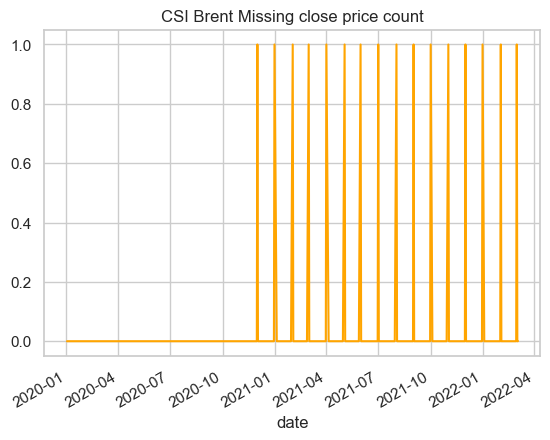

In [25]:
# basic line chart
csi_brent_plot = csi_lco_brent_missing_prices.plot.line(x="date", y="total",color="orange")
csi_brent_plot.set_title("CSI Brent Missing close price count")
csi_brent_plot.legend().remove()

#### Bloomberg CO (Brent Crude)

In [26]:
bbg_co_brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51512 entries, 0 to 51511
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        51512 non-null  object 
 1   symbol      51512 non-null  object 
 2   open        9467 non-null   float64
 3   high        9467 non-null   float64
 4   low         9467 non-null   float64
 5   close       50032 non-null  float64
 6   volume      18174 non-null  float64
 7   oi          26714 non-null  float64
 8   ref1        51512 non-null  object 
 9   ref2        51512 non-null  object 
 10  ref3        51512 non-null  object 
 11  sourcedate  51512 non-null  object 
 12  mic         51512 non-null  object 
 13  spec        51512 non-null  object 
 14  year        51512 non-null  int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 5.9+ MB


51512 rows and 15 columns

In [27]:
# let's have a simpler look at the null count across columns
print(bbg_co_brent.isna().sum())

date              0
symbol            0
open          42045
high          42045
low           42045
close          1480
volume        33338
oi            24798
ref1              0
ref2              0
ref3              0
sourcedate        0
mic               0
spec              0
year              0
dtype: int64


Quite a lot of missing prices for open/high/low columns - 42045 nulls, for close - 1480 missing.

In [28]:
# and column data types
bbg_co_brent.dtypes

date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
volume        float64
oi            float64
ref1           object
ref2           object
ref3           object
sourcedate     object
mic            object
spec           object
year            int64
dtype: object

In [29]:
# check for duplicates
print(bbg_co_brent.duplicated().sum()) 

0


No duplicates

In [30]:
bbg_co_brent.describe(include="all")

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year
count,51512,51512,9467.000000,9467.000000,9467.000000,50032.000000,18174.000000,26714.000000,51512,51512,51512,51512,51512,51512,51512.000000
unique,562,107,NaN,NaN,NaN,NaN,NaN,NaN,107,1,107,562,1,1,NaN
top,2020-01-02,COM3 Comdty,NaN,NaN,NaN,NaN,NaN,NaN,BBG00F5RFXK0,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043...",2020-01-02,IFEU,BBG,NaN
freq,107,562,NaN,NaN,NaN,NaN,NaN,NaN,562,51512,562,107,51512,51512,NaN
mean,NaN,NaN,57.601819,58.258150,56.965289,56.401269,26412.067514,51609.464925,NaN,NaN,NaN,NaN,NaN,NaN,2020.569712
std,NaN,NaN,13.743454,13.854069,13.702685,9.010167,65022.185491,96180.205378,NaN,NaN,NaN,NaN,NaN,NaN,0.615992
min,NaN,NaN,20.230000,21.910000,15.980000,19.990000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
25%,NaN,NaN,45.970000,46.435000,45.535000,50.000000,149.000000,940.250000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
50%,NaN,NaN,56.480000,56.840000,56.050000,55.480000,1441.500000,8527.000000,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000
75%,NaN,NaN,68.390000,68.970000,67.660000,61.360000,15084.000000,53762.250000,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000


In [31]:
# the head of the dataset
bbg_co_brent.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year
0,2020-01-02,COM3 Comdty,NaN,NaN,NaN,57.10,NaN,2565.0,BBG00F5RFXK0,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043...",2020-01-02,IFEU,BBG,2020
1,2020-03-27,COX1 Comdty,NaN,NaN,NaN,41.27,1486.0,13319.0,BBG006M2M299,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX216897...",2020-03-27,IFEU,BBG,2020
2,2020-01-03,COV2 Comdty,NaN,NaN,NaN,57.23,NaN,1589.0,BBG0083C09K0,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX248289...",2020-01-03,IFEU,BBG,2020
3,2020-01-06,COF4 Comdty,NaN,NaN,NaN,56.72,NaN,507.0,BBG00F5RFXS2,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043...",2020-01-06,IFEU,BBG,2020
4,2020-01-06,COH3 Comdty,NaN,NaN,NaN,56.93,NaN,1049.0,BBG00BSD47K4,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX300982...",2020-01-06,IFEU,BBG,2020


Initial observations for bbg Brent:

- Similar **"date"** & **"symbol"** columns, symbol format differs slightly at it seems.
- Looks like we have more missing values, specifically in the price columns
- the **"ref"** columns seem to have codes/id's that we might not need in our analysis
- **"source"** looks like an exact match of the **"date"** column but this will have to be checked
- similar logic for **"mic"** and **"spec"** columns as in CSI data
- **"year"** also seems to be just the year part of the **"date"** column

Let's proceed with our check in the same manner as with CSI data

In [32]:
# date column check
pd.to_datetime(bbg_co_brent["date"], format="%d/%m/%Y", errors="coerce").notna().sum()

0

In [33]:
# no issues here, but date column is of object type, let's convert to date before we analyse further
bbg_co_brent["date"] = pd.to_datetime(bbg_co_brent["date"], errors="coerce")

In [34]:
# date range
bbg_co_brent_minObsDt = bbg_co_brent["date"].min()
bbg_co_brent_maxObsDt = bbg_co_brent["date"].max()

print(bbg_co_brent_minObsDt)
print(bbg_co_brent_maxObsDt)

2020-01-02 00:00:00
2022-03-03 00:00:00


Our date range for Bloomberg Brent data is the same - from **2nd Jan 2020** to **3rd March 2022**.

In [35]:
# symbol column check
bbg_co_brent["symbol"].str.len()

0        11
1        11
2        11
3        11
4        11
         ..
51507    11
51508    11
51509    11
51510    11
51511    11
Name: symbol, Length: 51512, dtype: int64

In [36]:
# so it's worth checking if the length differs
bbg_co_brent[bbg_co_brent["symbol"].str.len() != 11]

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year


So all rows have the same length of 9 chars, but we our format is different so let's dive deeper.
We have the first two symbol set to **"CO"**, then we have the month code and the last digit of the year followed by "Comdty" in this case which is Bloomberg's **"yellow key"**.

In [37]:
# let's check the first 4 characters are always "CO" (for BBG Brent) followed by a letter and then a digit
bbg_co_brent["symbol"].str[:4].str.match(r"^CO[A-Z]\d$").sum() == len(bbg_co_brent)

True

In [38]:
# Let split our symbol column by slicing it into 3 instead given it passed our prior checks
bbg_co_brent["rootCode"] = bbg_co_brent["symbol"].str.slice(0, 2)  # First 2 characters
bbg_co_brent["deliveryMonthCode"] = bbg_co_brent["symbol"].str[2]           # Third character (Letter)
bbg_co_brent["deliveryYear"] = "202" + bbg_co_brent["symbol"].str[3]        # Fourth character (Digit)
bbg_co_brent.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear
0,2020-01-02,COM3 Comdty,NaN,NaN,NaN,57.10,NaN,2565.0,BBG00F5RFXK0,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043...",2020-01-02,IFEU,BBG,2020,CO,M,2023
1,2020-03-27,COX1 Comdty,NaN,NaN,NaN,41.27,1486.0,13319.0,BBG006M2M299,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX216897...",2020-03-27,IFEU,BBG,2020,CO,X,2021
2,2020-01-03,COV2 Comdty,NaN,NaN,NaN,57.23,NaN,1589.0,BBG0083C09K0,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX248289...",2020-01-03,IFEU,BBG,2020,CO,V,2022
3,2020-01-06,COF4 Comdty,NaN,NaN,NaN,56.72,NaN,507.0,BBG00F5RFXS2,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043...",2020-01-06,IFEU,BBG,2020,CO,F,2024
4,2020-01-06,COH3 Comdty,NaN,NaN,NaN,56.93,NaN,1049.0,BBG00BSD47K4,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX300982...",2020-01-06,IFEU,BBG,2020,CO,H,2023


Let's join the **bbg brent** data with the **month code** ref dataset to get month names

In [39]:
bbg_co_brent_merged = pd.merge(bbg_co_brent, ref_data_month_codes, left_on = "deliveryMonthCode", right_on = "Month Code", how = "left")
bbg_co_brent_merged.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear,Month,Month Code
0,2020-01-02,COM3 Comdty,NaN,NaN,NaN,57.10,NaN,2565.0,BBG00F5RFXK0,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043...",2020-01-02,IFEU,BBG,2020,CO,M,2023,June,M
1,2020-03-27,COX1 Comdty,NaN,NaN,NaN,41.27,1486.0,13319.0,BBG006M2M299,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX216897...",2020-03-27,IFEU,BBG,2020,CO,X,2021,November,X
2,2020-01-03,COV2 Comdty,NaN,NaN,NaN,57.23,NaN,1589.0,BBG0083C09K0,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX248289...",2020-01-03,IFEU,BBG,2020,CO,V,2022,October,V
3,2020-01-06,COF4 Comdty,NaN,NaN,NaN,56.72,NaN,507.0,BBG00F5RFXS2,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043...",2020-01-06,IFEU,BBG,2020,CO,F,2024,January,F
4,2020-01-06,COH3 Comdty,NaN,NaN,NaN,56.93,NaN,1049.0,BBG00BSD47K4,ICE,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX300982...",2020-01-06,IFEU,BBG,2020,CO,H,2023,March,H


In [40]:
# one delivery date column
bbg_co_brent_merged["deliveryDate"] = pd.to_datetime(bbg_co_brent_merged["Month"] + " " + bbg_co_brent_merged["deliveryYear"], format="%B %Y")
bbg_co_brent_merged.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,...,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear,Month,Month Code,deliveryDate
0,2020-01-02,COM3 Comdty,NaN,NaN,NaN,57.10,NaN,2565.0,BBG00F5RFXK0,ICE,...,2020-01-02,IFEU,BBG,2020,CO,M,2023,June,M,2023-06-01
1,2020-03-27,COX1 Comdty,NaN,NaN,NaN,41.27,1486.0,13319.0,BBG006M2M299,ICE,...,2020-03-27,IFEU,BBG,2020,CO,X,2021,November,X,2021-11-01
2,2020-01-03,COV2 Comdty,NaN,NaN,NaN,57.23,NaN,1589.0,BBG0083C09K0,ICE,...,2020-01-03,IFEU,BBG,2020,CO,V,2022,October,V,2022-10-01
3,2020-01-06,COF4 Comdty,NaN,NaN,NaN,56.72,NaN,507.0,BBG00F5RFXS2,ICE,...,2020-01-06,IFEU,BBG,2020,CO,F,2024,January,F,2024-01-01
4,2020-01-06,COH3 Comdty,NaN,NaN,NaN,56.93,NaN,1049.0,BBG00BSD47K4,ICE,...,2020-01-06,IFEU,BBG,2020,CO,H,2023,March,H,2023-03-01


In [41]:
# let's check the data types again
bbg_co_brent_merged.dtypes

date                 datetime64[ns]
symbol                       object
open                        float64
high                        float64
low                         float64
close                       float64
volume                      float64
oi                          float64
ref1                         object
ref2                         object
ref3                         object
sourcedate                   object
mic                          object
spec                         object
year                          int64
rootCode                     object
deliveryMonthCode            object
deliveryYear                 object
Month                        object
Month Code                   object
deliveryDate         datetime64[ns]
dtype: object

In [42]:
# same as for CSI data, it's worth checking the initial "year" column
(bbg_co_brent_merged["year"] == bbg_co_brent_merged["date"].dt.year).sum() == len(bbg_co_brent_merged)

True

In [43]:
# let's check if sourcedate matches date
(bbg_co_brent_merged["sourcedate"] == bbg_co_brent_merged["date"]).sum() == len(bbg_co_brent_merged)

True

In [44]:
# we can drop this column, with some others
bbg_co_brent_merged.drop(columns = ["symbol","ref1","ref2","sourcedate","year","deliveryMonthCode","deliveryYear","Month","Month Code"], inplace=True)
bbg_co_brent_merged = bbg_co_brent_merged[["date","deliveryDate","open","high","low","close","volume","oi","rootCode","spec","mic","ref3"]]
bbg_co_brent_merged.head()

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
0,2020-01-02,2023-06-01,NaN,NaN,NaN,57.10,NaN,2565.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043..."
1,2020-03-27,2021-11-01,NaN,NaN,NaN,41.27,1486.0,13319.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX216897..."
2,2020-01-03,2022-10-01,NaN,NaN,NaN,57.23,NaN,1589.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX248289..."
3,2020-01-06,2024-01-01,NaN,NaN,NaN,56.72,NaN,507.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043..."
4,2020-01-06,2023-03-01,NaN,NaN,NaN,56.93,NaN,1049.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX300982..."


In [45]:
# delivery date range
bbg_co_brent_merged_minDeliveryDt = bbg_co_brent_merged["deliveryDate"].min()
bbg_co_brent_merged_maxDeliveryDt = bbg_co_brent_merged["deliveryDate"].max()

print(bbg_co_brent_merged_minDeliveryDt)
print(bbg_co_brent_merged_maxDeliveryDt)

2020-03-01 00:00:00
2029-01-01 00:00:00


Interesting how our delivery date for Bloomberg Brent data only goes to **Jan 2029** and not to **March 2029** like with CSI data.

Let's check the rows where we have no prices

In [46]:
bbg_co_brent_merged[bbg_co_brent_merged["close"].isna()].sort_values(by="date", ascending=False)

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
48171,2022-03-03,2024-03-01,NaN,NaN,NaN,NaN,58.0,NaN,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043..."
49565,2022-03-03,2022-09-01,NaN,NaN,NaN,NaN,80240.0,NaN,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX248289..."
48600,2022-03-03,2022-05-01,NaN,NaN,NaN,NaN,452516.0,NaN,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX248289..."
51058,2022-03-03,2023-05-01,NaN,NaN,NaN,NaN,3016.0,NaN,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043..."
51039,2022-03-03,2023-08-01,NaN,NaN,NaN,NaN,345.0,NaN,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043..."
...,...,...,...,...,...,...,...,...,...,...,...,...
21036,2020-01-14,2022-05-01,NaN,NaN,NaN,NaN,70.0,614.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX248289..."
11922,2020-01-14,2020-10-01,NaN,NaN,NaN,NaN,7390.0,89151.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX216896..."
11791,2020-01-14,2020-07-01,NaN,NaN,NaN,NaN,46469.0,150605.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX216896..."
21929,2020-01-14,2023-06-01,NaN,NaN,NaN,NaN,2.0,2931.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043..."


Quite a lot of missing prices - **1480**

In [47]:
# missing close prices for each observation date
bbg_co_brent_missing_prices = bbg_co_brent_merged.groupby(["date"])["close"].apply(lambda x: x.isna().sum()).reset_index(name ='total')

# above 0
bbg_co_brent_missing_prices[bbg_co_brent_missing_prices["total"]>0].sort_values(by = "date", ascending = False)

,date,total
561,2022-03-03,34
558,2022-02-28,1
554,2022-02-22,17
553,2022-02-21,25
549,2022-02-15,42
...,...,...
43,2020-03-03,5
40,2020-02-27,24
21,2020-01-31,1
13,2020-01-21,52


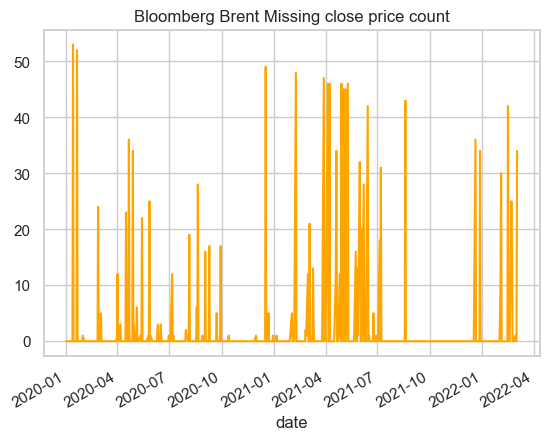

In [48]:
# basic line chart
bbg_brent_plot = bbg_co_brent_missing_prices.plot.line(x="date", y="total",color="orange")
bbg_brent_plot.set_title("Bloomberg Brent Missing close price count")
bbg_brent_plot.legend().remove()

#### CIS ES (e-mini S&P 500 Index)

In [49]:
csi_es_snp_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        4070 non-null   object 
 1   symbol      4070 non-null   object 
 2   open        4064 non-null   float64
 3   high        4064 non-null   float64
 4   low         4064 non-null   float64
 5   close       4064 non-null   float64
 6   volume      4070 non-null   int64  
 7   oi          4070 non-null   int64  
 8   ref1        4070 non-null   int64  
 9   ref2        4070 non-null   int64  
 10  ref3        4070 non-null   object 
 11  sourcedate  0 non-null      float64
 12  mic         4070 non-null   object 
 13  spec        4070 non-null   object 
 14  year        4070 non-null   int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 477.1+ KB


4070 rows and 15 columns

In [50]:
print(csi_es_snp_index.isna().sum())

date             0
symbol           0
open             6
high             6
low              6
close            6
volume           0
oi               0
ref1             0
ref2             0
ref3             0
sourcedate    4070
mic              0
spec             0
year             0
dtype: int64


6 rows with missing prices

In [51]:
# and column data types
csi_es_snp_index.dtypes

date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
volume          int64
oi              int64
ref1            int64
ref2            int64
ref3           object
sourcedate    float64
mic            object
spec           object
year            int64
dtype: object

In [52]:
# check for duplicates
print(csi_es_snp_index.duplicated().sum()) 

0


No duplicates.

In [53]:
csi_es_snp_index.describe(include="all")

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year
count,4070,4070,4064.000000,4064.000000,4064.000000,4064.000000,4.070000e+03,4.070000e+03,4070.0,4070.000000,4070,0.0,4070,4070,4070.000000
unique,547,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,1,NaN
top,2021-06-18,ES_M2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e-mini S&P 500 Index,NaN,XCME,CSIDATA,NaN
freq,13,318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3566,NaN,4070,4070,NaN
mean,NaN,NaN,3999.301735,4012.745202,3984.729023,4000.184178,2.427265e+05,3.660001e+05,487.0,2202.945700,NaN,NaN,NaN,NaN,2020.810811
std,NaN,NaN,611.313315,602.477723,620.388020,610.453641,6.372453e+05,8.815399e+05,0.0,148.601181,NaN,NaN,NaN,NaN,0.633373
min,NaN,NaN,2202.500000,2202.500000,2165.500000,2202.500000,0.000000e+00,0.000000e+00,487.0,2003.000000,NaN,NaN,NaN,NaN,2020.000000
25%,NaN,NaN,3438.312500,3459.625000,3421.437500,3440.375000,0.000000e+00,0.000000e+00,487.0,2106.000000,NaN,NaN,NaN,NaN,2020.000000
50%,NaN,NaN,4247.250000,4250.750000,4237.250000,4247.250000,0.000000e+00,2.500000e+02,487.0,2203.000000,NaN,NaN,NaN,NaN,2021.000000
75%,NaN,NaN,4465.562500,4473.062500,4457.125000,4464.625000,1.551500e+03,4.572200e+04,487.0,2306.000000,NaN,NaN,NaN,NaN,2021.000000


In [54]:
# check the "rf3" column, as it looks like we have 2 values for our asset present which is incostitent
csi_es_snp_index["ref3"].value_counts()

ref3
e-mini S&P 500 Index                   3566
{"csi_name":"e-mini S&P 500 Index"}     504
Name: count, dtype: int64

In [55]:
csi_es_snp_index.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year
0,2021-12-30,ES_Z2025,4843.00,4843.00,4843.00,4843.00,0,0,487,2512,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021
1,2021-02-22,ES_U2021,3875.50,3892.50,3840.50,3852.25,52,877,487,2109,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021
2,2021-04-29,ES_M2022,4163.50,4163.50,4163.50,4163.50,0,10,487,2206,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021
3,2021-07-19,ES_Z2022,4205.25,4205.25,4205.25,4205.25,25,25,487,2212,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021
4,2021-07-26,ES_M2023,4355.50,4355.50,4355.50,4355.50,0,0,487,2306,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021


Let's proceed with the same checks next.

In [56]:
# date column check
pd.to_datetime(csi_es_snp_index["date"], format="%d/%m/%Y", errors="coerce").notna().sum()

0

In [57]:
# date column is of object type, let's convert to date before we analyse further
csi_es_snp_index["date"] = pd.to_datetime(csi_es_snp_index["date"], errors="coerce")

In [58]:
# date range
csi_es_snp_index_minObsDt = csi_es_snp_index["date"].min()
csi_es_snp_index_maxObsDt = csi_es_snp_index["date"].max()

print(csi_es_snp_index_minObsDt)
print(csi_es_snp_index_maxObsDt)

2020-01-02 00:00:00
2022-03-03 00:00:00


Date range for CSI ES - **2nd Jan 2020** to **3rd March 2022**.

In [59]:
# symbol column check
csi_es_snp_index["symbol"].str.len()

0       8
1       8
2       8
3       8
4       8
       ..
4065    8
4066    8
4067    8
4068    8
4069    8
Name: symbol, Length: 4070, dtype: int64

In [60]:
# check length
csi_es_snp_index[csi_es_snp_index["symbol"].str.len() != 8]

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year


In [61]:
# all rows show the same length which is consistent, let's check the right 5 string characters as it's our delivery month and year
# so we check the 5th from the right character to be a letter (month code) and then 4 digits for the year, let's check these with regex
csi_es_snp_index["symbol"].str[-5:].str.match(r"^[A-Z]\d{4}$").sum() == len(csi_es_snp_index)

True

In [62]:
csi_es_snp_index["rootCode"] = csi_es_snp_index["symbol"].str.split("_", n=1, expand=True)[0]
csi_es_snp_index["deliveryMonthCode"] = csi_es_snp_index["symbol"].str.split("_", n=1, expand=True)[1].str[0]
csi_es_snp_index["deliveryYear"] = csi_es_snp_index["symbol"].str.split("_", n=1, expand=True)[1].str[1:]
csi_es_snp_index.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear
0,2021-12-30,ES_Z2025,4843.00,4843.00,4843.00,4843.00,0,0,487,2512,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,Z,2025
1,2021-02-22,ES_U2021,3875.50,3892.50,3840.50,3852.25,52,877,487,2109,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,U,2021
2,2021-04-29,ES_M2022,4163.50,4163.50,4163.50,4163.50,0,10,487,2206,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,M,2022
3,2021-07-19,ES_Z2022,4205.25,4205.25,4205.25,4205.25,25,25,487,2212,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,Z,2022
4,2021-07-26,ES_M2023,4355.50,4355.50,4355.50,4355.50,0,0,487,2306,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,M,2023


Let's join the data with the **month code** ref dataset to get month names

In [63]:
csi_es_snp_index_merged = pd.merge(csi_es_snp_index, ref_data_month_codes, left_on = "deliveryMonthCode", right_on = "Month Code", how = "left")
csi_es_snp_index_merged.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear,Month,Month Code
0,2021-12-30,ES_Z2025,4843.00,4843.00,4843.00,4843.00,0,0,487,2512,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,Z,2025,December,Z
1,2021-02-22,ES_U2021,3875.50,3892.50,3840.50,3852.25,52,877,487,2109,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,U,2021,September,U
2,2021-04-29,ES_M2022,4163.50,4163.50,4163.50,4163.50,0,10,487,2206,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,M,2022,June,M
3,2021-07-19,ES_Z2022,4205.25,4205.25,4205.25,4205.25,25,25,487,2212,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,Z,2022,December,Z
4,2021-07-26,ES_M2023,4355.50,4355.50,4355.50,4355.50,0,0,487,2306,e-mini S&P 500 Index,NaN,XCME,CSIDATA,2021,ES,M,2023,June,M


In [64]:
# one delivery date column
csi_es_snp_index_merged["deliveryDate"] = pd.to_datetime(csi_es_snp_index_merged["Month"] + " " + csi_es_snp_index_merged["deliveryYear"], format="%B %Y")
csi_es_snp_index_merged.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,...,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear,Month,Month Code,deliveryDate
0,2021-12-30,ES_Z2025,4843.00,4843.00,4843.00,4843.00,0,0,487,2512,...,NaN,XCME,CSIDATA,2021,ES,Z,2025,December,Z,2025-12-01
1,2021-02-22,ES_U2021,3875.50,3892.50,3840.50,3852.25,52,877,487,2109,...,NaN,XCME,CSIDATA,2021,ES,U,2021,September,U,2021-09-01
2,2021-04-29,ES_M2022,4163.50,4163.50,4163.50,4163.50,0,10,487,2206,...,NaN,XCME,CSIDATA,2021,ES,M,2022,June,M,2022-06-01
3,2021-07-19,ES_Z2022,4205.25,4205.25,4205.25,4205.25,25,25,487,2212,...,NaN,XCME,CSIDATA,2021,ES,Z,2022,December,Z,2022-12-01
4,2021-07-26,ES_M2023,4355.50,4355.50,4355.50,4355.50,0,0,487,2306,...,NaN,XCME,CSIDATA,2021,ES,M,2023,June,M,2023-06-01


In [65]:
# let's check the data types again
csi_es_snp_index_merged.dtypes

date                 datetime64[ns]
symbol                       object
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
oi                            int64
ref1                          int64
ref2                          int64
ref3                         object
sourcedate                  float64
mic                          object
spec                         object
year                          int64
rootCode                     object
deliveryMonthCode            object
deliveryYear                 object
Month                        object
Month Code                   object
deliveryDate         datetime64[ns]
dtype: object

In [66]:
# all values are true so we can drop this column, with some others
csi_es_snp_index_merged.drop(columns = ["symbol","ref1","ref2","sourcedate","year","deliveryMonthCode","deliveryYear","Month","Month Code"], inplace=True)
csi_es_snp_index_merged = csi_es_snp_index_merged[["date","deliveryDate","open","high","low","close","volume","oi","rootCode","spec","mic","ref3"]]
csi_es_snp_index_merged.head()

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
0,2021-12-30,2025-12-01,4843.00,4843.00,4843.00,4843.00,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index
1,2021-02-22,2021-09-01,3875.50,3892.50,3840.50,3852.25,52,877,ES,CSIDATA,XCME,e-mini S&P 500 Index
2,2021-04-29,2022-06-01,4163.50,4163.50,4163.50,4163.50,0,10,ES,CSIDATA,XCME,e-mini S&P 500 Index
3,2021-07-19,2022-12-01,4205.25,4205.25,4205.25,4205.25,25,25,ES,CSIDATA,XCME,e-mini S&P 500 Index
4,2021-07-26,2023-06-01,4355.50,4355.50,4355.50,4355.50,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index


In [67]:
# delivery date range
csi_es_snp_index_merged_minDeliveryDt = csi_es_snp_index_merged["deliveryDate"].min()
csi_es_snp_index_merged_maxDeliveryDt = csi_es_snp_index_merged["deliveryDate"].max()

print(csi_es_snp_index_merged_minDeliveryDt)
print(csi_es_snp_index_merged_maxDeliveryDt)

2020-03-01 00:00:00
2026-12-01 00:00:00


CSI e-mini S&P 500 Index delivery date ranges from **March 2020** to **Dec 2026**.

Let's check the rows where we have no prices. We can check the **"close"** price.

In [68]:
csi_es_snp_index_merged[csi_es_snp_index_merged["close"].isna()].sort_values(by="date", ascending=False)

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
1437,2021-12-20,2021-12-01,NaN,NaN,NaN,NaN,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index
1999,2021-09-20,2021-09-01,NaN,NaN,NaN,NaN,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index
205,2021-06-22,2021-06-01,NaN,NaN,NaN,NaN,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index
1399,2021-06-21,2021-06-01,NaN,NaN,NaN,NaN,0,73,ES,CSIDATA,XCME,e-mini S&P 500 Index
566,2021-03-22,2021-03-01,NaN,NaN,NaN,NaN,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index
2429,2020-12-21,2020-12-01,NaN,NaN,NaN,NaN,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index


In [69]:
# missing close prices for each observation date
csi_es_snp_index_missing_prices = csi_es_snp_index_merged.groupby(["date"])["close"].apply(lambda x: x.isna().sum()).reset_index(name ='total')

# above 0
csi_es_snp_index_missing_prices[csi_es_snp_index_missing_prices["total"]>0]

,date,total
245,2020-12-21,1
306,2021-03-22,1
369,2021-06-21,1
370,2021-06-22,1
432,2021-09-20,1
496,2021-12-20,1


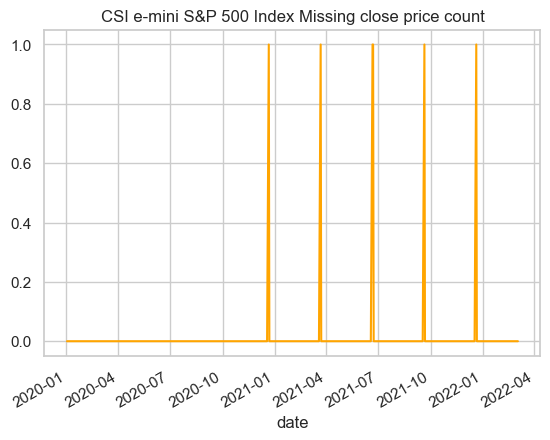

In [70]:
# basic line chart
csi_es_plot = csi_es_snp_index_missing_prices.plot.line(x="date", y="total",color="orange")
csi_es_plot.set_title("CSI e-mini S&P 500 Index Missing close price count")
csi_es_plot.legend().remove()

####

#### Bloomberg ES (e-mini S&P 500 Index)

In [71]:
bbg_es_snp_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        4142 non-null   object 
 1   symbol      4142 non-null   object 
 2   open        1847 non-null   float64
 3   high        1847 non-null   float64
 4   low         1847 non-null   float64
 5   close       4090 non-null   float64
 6   volume      1932 non-null   float64
 7   oi          2929 non-null   float64
 8   ref1        4142 non-null   object 
 9   ref2        4142 non-null   object 
 10  ref3        4142 non-null   object 
 11  sourcedate  4142 non-null   object 
 12  mic         4142 non-null   object 
 13  spec        4142 non-null   object 
 14  year        4142 non-null   int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 485.5+ KB


4142 rows and 15 columns

In [72]:
# let's have a simpler look at the null count across columns
print(bbg_es_snp_index.isna().sum())

date             0
symbol           0
open          2295
high          2295
low           2295
close           52
volume        2210
oi            1213
ref1             0
ref2             0
ref3             0
sourcedate       0
mic              0
spec             0
year             0
dtype: int64


We have missing prices open/high/close 2295 missing, close - 52.

In [73]:
# and column data types
bbg_es_snp_index.dtypes

date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
volume        float64
oi            float64
ref1           object
ref2           object
ref3           object
sourcedate     object
mic            object
spec           object
year            int64
dtype: object

In [74]:
# check for duplicates
print(bbg_es_snp_index.duplicated().sum()) 

0


No duplicates.

In [75]:
bbg_es_snp_index.describe(include="all")

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year
count,4142,4142,1847.000000,1847.000000,1847.000000,4090.000000,1.932000e+03,2.929000e+03,4142,4142,4142,4142,4142,4142,4142.000000
unique,562,20,NaN,NaN,NaN,NaN,NaN,NaN,20,1,20,562,1,1,NaN
top,2021-06-17,ESZ1 Index,NaN,NaN,NaN,NaN,NaN,NaN,BBG00X7L5C47,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX527174...",2021-06-17,XCME,BBG,NaN
freq,13,328,NaN,NaN,NaN,NaN,NaN,NaN,328,4142,328,13,4142,4142,NaN
mean,NaN,NaN,3767.147807,3793.653763,3738.923525,3994.890232,3.097832e+05,5.068722e+05,NaN,NaN,NaN,NaN,NaN,NaN,2020.803718
std,NaN,NaN,629.357884,623.177243,634.797233,612.093097,5.438709e+05,1.003990e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.632651
min,NaN,NaN,2220.250000,2315.500000,2165.500000,2202.500000,1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
25%,NaN,NaN,3272.500000,3292.875000,3246.250000,3432.312500,2.800000e+01,6.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000
50%,NaN,NaN,3791.250000,3813.000000,3765.750000,4236.375000,1.149500e+03,2.252000e+03,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000
75%,NaN,NaN,4347.625000,4382.875000,4315.250000,4463.937500,6.000952e+05,6.438900e+04,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000


In [76]:
# the head of the dataset
bbg_es_snp_index.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year
0,2021-05-24,ESH2 Index,NaN,NaN,NaN,4165.25,NaN,1029.0,BBG00YGNQDQ2,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX532555...",2021-05-24,XCME,BBG,2021
1,2021-01-29,ESH1 Index,3770.25,3777.25,3685.5,3705.25,1256554.0,2640928.0,BBG00R2NN8P7,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX505063...",2021-01-29,XCME,BBG,2021
2,2021-06-21,ESH3 Index,NaN,NaN,NaN,4157.75,NaN,NaN,BBG011BQCMM0,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-06-21,XCME,BBG,2021
3,2021-06-23,ESZ3 Index,NaN,NaN,NaN,4170.75,NaN,NaN,BBG011BQCN48,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-06-23,XCME,BBG,2021
4,2021-07-02,ESM3 Index,NaN,NaN,NaN,4287.00,NaN,NaN,BBG011BQCMW9,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-07-02,XCME,BBG,2021


In [77]:
# date column check
pd.to_datetime(bbg_es_snp_index["date"], format="%d/%m/%Y", errors="coerce").notna().sum()

0

In [78]:
# no issues here, but date column is of object type, let's convert to date before we analyse further
bbg_es_snp_index["date"] = pd.to_datetime(bbg_es_snp_index["date"], errors="coerce")

In [79]:
# date range
bbg_es_snp_index_minObsDt = bbg_es_snp_index["date"].min()
bbg_es_snp_index_maxObsDt = bbg_es_snp_index["date"].max()

print(bbg_es_snp_index_minObsDt)
print(bbg_es_snp_index_maxObsDt)

2020-01-02 00:00:00
2022-03-03 00:00:00


Our date range for Bloomberg ES S&P data is the same - from **2nd Jan 2020** to **3rd March 2022**.

In [80]:
# symbol column check
bbg_es_snp_index["symbol"].str.len()

0       10
1       10
2       10
3       10
4       10
        ..
4137    10
4138    10
4139    10
4140    10
4141    10
Name: symbol, Length: 4142, dtype: int64

In [81]:
# so it's worth checking if the length differs
bbg_es_snp_index[bbg_es_snp_index["symbol"].str.len() != 10]

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year


In [82]:
# let's check the first 4 characters are always "ES" followed by a letter and then a digit
bbg_es_snp_index["symbol"].str[:4].str.match(r"^ES[A-Z]\d$").sum() == len(bbg_es_snp_index)

True

In [83]:
# Let split our symbol column by slicing it into 3 instead given it passed our prior checks
bbg_es_snp_index["rootCode"] = bbg_es_snp_index["symbol"].str.slice(0, 2)  # First 2 characters
bbg_es_snp_index["deliveryMonthCode"] = bbg_es_snp_index["symbol"].str[2]           # Third character (Letter)
bbg_es_snp_index["deliveryYear"] = "202" + bbg_es_snp_index["symbol"].str[3]        # Fourth character (Digit)
bbg_es_snp_index.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear
0,2021-05-24,ESH2 Index,NaN,NaN,NaN,4165.25,NaN,1029.0,BBG00YGNQDQ2,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX532555...",2021-05-24,XCME,BBG,2021,ES,H,2022
1,2021-01-29,ESH1 Index,3770.25,3777.25,3685.5,3705.25,1256554.0,2640928.0,BBG00R2NN8P7,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX505063...",2021-01-29,XCME,BBG,2021,ES,H,2021
2,2021-06-21,ESH3 Index,NaN,NaN,NaN,4157.75,NaN,NaN,BBG011BQCMM0,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-06-21,XCME,BBG,2021,ES,H,2023
3,2021-06-23,ESZ3 Index,NaN,NaN,NaN,4170.75,NaN,NaN,BBG011BQCN48,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-06-23,XCME,BBG,2021,ES,Z,2023
4,2021-07-02,ESM3 Index,NaN,NaN,NaN,4287.00,NaN,NaN,BBG011BQCMW9,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-07-02,XCME,BBG,2021,ES,M,2023


Let's join the data with the **month code** ref dataset to get month names

In [84]:
bbg_es_snp_index_merged = pd.merge(bbg_es_snp_index, ref_data_month_codes, left_on = "deliveryMonthCode", right_on = "Month Code", how = "left")
bbg_es_snp_index_merged.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,ref3,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear,Month,Month Code
0,2021-05-24,ESH2 Index,NaN,NaN,NaN,4165.25,NaN,1029.0,BBG00YGNQDQ2,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX532555...",2021-05-24,XCME,BBG,2021,ES,H,2022,March,H
1,2021-01-29,ESH1 Index,3770.25,3777.25,3685.5,3705.25,1256554.0,2640928.0,BBG00R2NN8P7,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX505063...",2021-01-29,XCME,BBG,2021,ES,H,2021,March,H
2,2021-06-21,ESH3 Index,NaN,NaN,NaN,4157.75,NaN,NaN,BBG011BQCMM0,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-06-21,XCME,BBG,2021,ES,H,2023,March,H
3,2021-06-23,ESZ3 Index,NaN,NaN,NaN,4170.75,NaN,NaN,BBG011BQCN48,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-06-23,XCME,BBG,2021,ES,Z,2023,December,Z
4,2021-07-02,ESM3 Index,NaN,NaN,NaN,4287.00,NaN,NaN,BBG011BQCMW9,CME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606...",2021-07-02,XCME,BBG,2021,ES,M,2023,June,M


In [85]:
# one delivery date column
bbg_es_snp_index_merged["deliveryDate"] = pd.to_datetime(bbg_es_snp_index_merged["Month"] + " " + bbg_es_snp_index_merged["deliveryYear"], format="%B %Y")
bbg_es_snp_index_merged.head()

,date,symbol,open,high,low,close,volume,oi,ref1,ref2,...,sourcedate,mic,spec,year,rootCode,deliveryMonthCode,deliveryYear,Month,Month Code,deliveryDate
0,2021-05-24,ESH2 Index,NaN,NaN,NaN,4165.25,NaN,1029.0,BBG00YGNQDQ2,CME,...,2021-05-24,XCME,BBG,2021,ES,H,2022,March,H,2022-03-01
1,2021-01-29,ESH1 Index,3770.25,3777.25,3685.5,3705.25,1256554.0,2640928.0,BBG00R2NN8P7,CME,...,2021-01-29,XCME,BBG,2021,ES,H,2021,March,H,2021-03-01
2,2021-06-21,ESH3 Index,NaN,NaN,NaN,4157.75,NaN,NaN,BBG011BQCMM0,CME,...,2021-06-21,XCME,BBG,2021,ES,H,2023,March,H,2023-03-01
3,2021-06-23,ESZ3 Index,NaN,NaN,NaN,4170.75,NaN,NaN,BBG011BQCN48,CME,...,2021-06-23,XCME,BBG,2021,ES,Z,2023,December,Z,2023-12-01
4,2021-07-02,ESM3 Index,NaN,NaN,NaN,4287.00,NaN,NaN,BBG011BQCMW9,CME,...,2021-07-02,XCME,BBG,2021,ES,M,2023,June,M,2023-06-01


In [86]:
# let's check the data types again
bbg_es_snp_index_merged.dtypes

date                 datetime64[ns]
symbol                       object
open                        float64
high                        float64
low                         float64
close                       float64
volume                      float64
oi                          float64
ref1                         object
ref2                         object
ref3                         object
sourcedate                   object
mic                          object
spec                         object
year                          int64
rootCode                     object
deliveryMonthCode            object
deliveryYear                 object
Month                        object
Month Code                   object
deliveryDate         datetime64[ns]
dtype: object

In [87]:
# we can drop some columns now
bbg_es_snp_index_merged.drop(columns = ["symbol","ref1","ref2","sourcedate","year","deliveryMonthCode","deliveryYear","Month","Month Code"], inplace=True)
bbg_es_snp_index_merged = bbg_es_snp_index_merged[["date","deliveryDate","open","high","low","close","volume","oi","rootCode","spec","mic","ref3"]]
bbg_es_snp_index_merged.head()

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
0,2021-05-24,2022-03-01,NaN,NaN,NaN,4165.25,NaN,1029.0,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX532555..."
1,2021-01-29,2021-03-01,3770.25,3777.25,3685.5,3705.25,1256554.0,2640928.0,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX505063..."
2,2021-06-21,2023-03-01,NaN,NaN,NaN,4157.75,NaN,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."
3,2021-06-23,2023-12-01,NaN,NaN,NaN,4170.75,NaN,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."
4,2021-07-02,2023-06-01,NaN,NaN,NaN,4287.00,NaN,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."


In [88]:
# delivery date range
bbg_es_snp_index_merged_minDeliveryDt = bbg_es_snp_index_merged["deliveryDate"].min()
bbg_es_snp_index_merged_maxDeliveryDt = bbg_es_snp_index_merged["deliveryDate"].max()

print(bbg_es_snp_index_merged_minDeliveryDt)
print(bbg_es_snp_index_merged_maxDeliveryDt)

2020-03-01 00:00:00
2026-12-01 00:00:00


Bloomberg ES (S&P) delivery dates range from **March 2020** to **Dec 2026**.

Let's check the rows where we have no prices.

In [89]:
bbg_es_snp_index_merged[bbg_es_snp_index_merged["close"].isna()].sort_values(by="date", ascending=False)

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
3647,2022-03-03,2022-06-01,NaN,NaN,NaN,NaN,17329.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX535371..."
4103,2022-03-03,2022-09-01,NaN,NaN,NaN,NaN,100.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."
3907,2022-03-03,2022-03-01,NaN,NaN,NaN,NaN,803801.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX532555..."
3977,2022-03-03,2022-12-01,NaN,NaN,NaN,NaN,12.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."
3811,2022-02-21,2022-06-01,NaN,NaN,NaN,NaN,1962.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX535371..."
4017,2022-02-21,2022-03-01,NaN,NaN,NaN,NaN,395962.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX532555..."
4123,2022-02-21,2022-09-01,NaN,NaN,NaN,NaN,27.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."
4039,2022-01-17,2022-06-01,NaN,NaN,NaN,NaN,220.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX535371..."
3702,2022-01-17,2022-09-01,NaN,NaN,NaN,NaN,1.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."
3979,2022-01-17,2022-03-01,NaN,NaN,NaN,NaN,156659.0,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX532555..."


In [90]:
# missing close prices for each observation date
bbg_es_snp_index_missing_prices = bbg_es_snp_index_merged.groupby(["date"])["close"].apply(lambda x: x.isna().sum()).reset_index(name ='total')

# above 0
bbg_es_snp_index_missing_prices[bbg_es_snp_index_missing_prices["total"]>0].sort_values(by = "date", ascending = False)

,date,total
561,2022-03-03,4
553,2022-02-21,3
528,2022-01-17,3
508,2021-12-17,1
492,2021-11-25,3
443,2021-09-17,1
434,2021-09-06,3
389,2021-07-05,2
378,2021-06-18,1
364,2021-05-31,3


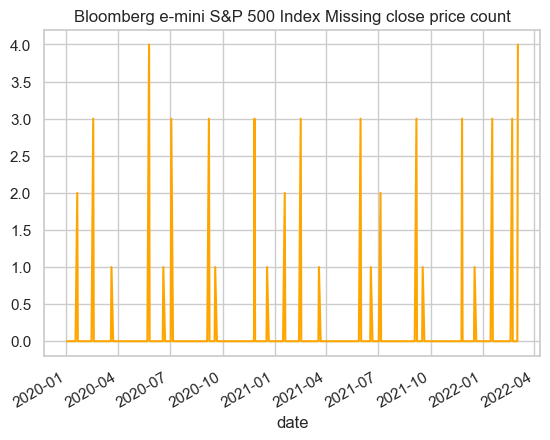

In [91]:
# basic line chart
bbg_es_snp_index_plot = bbg_es_snp_index_missing_prices.plot.line(x="date", y="total",color="orange")
bbg_es_snp_index_plot.set_title("Bloomberg e-mini S&P 500 Index Missing close price count")
bbg_es_snp_index_plot.legend().remove()

### Full mapping table of all futures contracts data between the vendors.

Let's now merge our reformatted datasets together to have one master data table.

**Dataset list**

**Brent Crude**
- csi_lco_brent_merged
- bbg_co_brent_merged

**e-mini S&P 500 Index**
- csi_es_snp_index_merged
- bbg_es_snp_index_merged


In [92]:
# CSI Brent
csi_lco_brent_merged.head()

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
0,2020-02-17,2026-09-01,57.26,57.26,57.26,57.26,0,0,LCO,CSIDATA,IFEU,Brent Crude
1,2020-06-30,2021-11-01,43.93,43.93,43.93,43.93,325,18805,LCO,CSIDATA,IFEU,Brent Crude
2,2020-08-19,2021-09-01,48.69,48.69,48.69,48.69,1531,46557,LCO,CSIDATA,IFEU,Brent Crude
3,2020-03-10,2025-09-01,53.36,53.36,53.36,53.36,0,0,LCO,CSIDATA,IFEU,Brent Crude
4,2020-07-10,2024-06-01,50.58,50.58,50.58,50.58,0,2171,LCO,CSIDATA,IFEU,Brent Crude


In [93]:
# we had two values in column ref3, let's utilise one for the whole column
csi_lco_brent_merged["ref3"].value_counts()

ref3
Brent Crude                   50485
{"csi_name":"Brent Crude"}     3716
Name: count, dtype: int64

In [94]:
csi_lco_brent_merged["ref3"] = "Brent Crude"
csi_lco_brent_merged["ref3"].value_counts()

ref3
Brent Crude    54201
Name: count, dtype: int64

In [95]:
# BBG Brent
bbg_co_brent_merged.head()

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
0,2020-01-02,2023-06-01,NaN,NaN,NaN,57.10,NaN,2565.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043..."
1,2020-03-27,2021-11-01,NaN,NaN,NaN,41.27,1486.0,13319.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX216897..."
2,2020-01-03,2022-10-01,NaN,NaN,NaN,57.23,NaN,1589.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX248289..."
3,2020-01-06,2024-01-01,NaN,NaN,NaN,56.72,NaN,507.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX338043..."
4,2020-01-06,2023-03-01,NaN,NaN,NaN,56.93,NaN,1049.0,CO,BBG,IFEU,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX300982..."


In [96]:
bbg_co_brent_merged["ref3"].value_counts()

ref3
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX33804322-0"}    562
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX42555245-0"}    562
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX24828984-0"}    562
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX33804370-0"}    562
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX33804340-0"}    562
                                                       ... 
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX21689640-0"}    106
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX21504775-0"}     85
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX21689634-0"}     64
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX21689628-0"}     42
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX20228631-0"}     22
Name: count, Length: 107, dtype: int64

Let's replace our values in rf3 with "Brent Crude" in a similar manner. We can use the same logic for the rest of the datasets.

In [97]:
bbg_co_brent_merged["ref3"] = "Brent Crude"
bbg_co_brent_merged["ref3"].value_counts()

ref3
Brent Crude    51512
Name: count, dtype: int64

In [98]:
# CSI e-mini S&P 500 Index
csi_es_snp_index_merged.head()

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
0,2021-12-30,2025-12-01,4843.00,4843.00,4843.00,4843.00,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index
1,2021-02-22,2021-09-01,3875.50,3892.50,3840.50,3852.25,52,877,ES,CSIDATA,XCME,e-mini S&P 500 Index
2,2021-04-29,2022-06-01,4163.50,4163.50,4163.50,4163.50,0,10,ES,CSIDATA,XCME,e-mini S&P 500 Index
3,2021-07-19,2022-12-01,4205.25,4205.25,4205.25,4205.25,25,25,ES,CSIDATA,XCME,e-mini S&P 500 Index
4,2021-07-26,2023-06-01,4355.50,4355.50,4355.50,4355.50,0,0,ES,CSIDATA,XCME,e-mini S&P 500 Index


In [99]:
csi_es_snp_index_merged["ref3"].value_counts()

ref3
e-mini S&P 500 Index                   3566
{"csi_name":"e-mini S&P 500 Index"}     504
Name: count, dtype: int64

In [100]:
csi_es_snp_index_merged["ref3"] = "e-mini S&P 500 Index"
csi_es_snp_index_merged["ref3"].value_counts()

ref3
e-mini S&P 500 Index    4070
Name: count, dtype: int64

In [101]:
# BBG e-mini S&P 500 Index
bbg_es_snp_index_merged.head()

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,ref3
0,2021-05-24,2022-03-01,NaN,NaN,NaN,4165.25,NaN,1029.0,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX532555..."
1,2021-01-29,2021-03-01,3770.25,3777.25,3685.5,3705.25,1256554.0,2640928.0,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX505063..."
2,2021-06-21,2023-03-01,NaN,NaN,NaN,4157.75,NaN,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."
3,2021-06-23,2023-12-01,NaN,NaN,NaN,4170.75,NaN,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."
4,2021-07-02,2023-06-01,NaN,NaN,NaN,4287.00,NaN,NaN,ES,BBG,XCME,"{""FUT_PX_SESSION"":""S"",""ID_BB_UNIQUE"":""IX537606..."


In [102]:
bbg_es_snp_index_merged["ref3"].value_counts()

ref3
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX52717465-0"}    328
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX51343796-0"}    327
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX52155006-0"}    327
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53255566-0"}    315
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX50506348-0"}    312
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53537135-0"}    253
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX49285223-0"}    249
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53760603-0"}    191
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53760621-0"}    189
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53760636-0"}    188
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53760667-0"}    188
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53760653-0"}    188
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53760683-0"}    188
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53760698-0"}    188
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX48349603-0"}    185
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE":"IX53770993-0"}    179
{"FUT_PX_SESSION":"S","ID_BB_UNIQUE

In [103]:
bbg_es_snp_index_merged["ref3"] = "e-mini S&P 500 Index"
bbg_es_snp_index_merged["ref3"].value_counts()

ref3
e-mini S&P 500 Index    4142
Name: count, dtype: int64

Ok, so now we can merge our datasets

In [104]:
union = pd.concat([csi_lco_brent_merged, bbg_co_brent_merged, csi_es_snp_index_merged, bbg_es_snp_index_merged], ignore_index=True)
# let's check our master dataset
union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113925 entries, 0 to 113924
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          113925 non-null  datetime64[ns]
 1   deliveryDate  113925 non-null  datetime64[ns]
 2   open          69563 non-null   float64       
 3   high          69563 non-null   float64       
 4   low           69563 non-null   float64       
 5   close         112371 non-null  float64       
 6   volume        78377 non-null   float64       
 7   oi            87914 non-null   float64       
 8   rootCode      113925 non-null  object        
 9   spec          113925 non-null  object        
 10  mic           113925 non-null  object        
 11  ref3          113925 non-null  object        
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 10.4+ MB


199388 rows and 12 columns, let's check the row count

In [105]:
len(csi_lco_brent_merged)+len(bbg_co_brent_merged)+len(csi_es_snp_index_merged)+len(bbg_es_snp_index_merged) == len(union)

True

Row count sum matches, which is good. Let's rename our column "ref3".

In [106]:
union = union.rename(columns={"ref3": "refName"})

In [107]:
#let's export our master dataset for Question 3
#union.to_csv("Question3.csv", index=False)

### Summary of the data consistency with some critical observations regarding the patterns found in the analysis, along with visualisations to help highlighting these important factors.

Let's analyse our dataset and compare the data across two vendors for our 5 assets.

#### Brent Crude

In [108]:
union[union["refName"] == "Brent Crude"]

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,refName
0,2020-02-17,2026-09-01,57.26,57.26,57.26,57.26,0.0,0.0,LCO,CSIDATA,IFEU,Brent Crude
1,2020-06-30,2021-11-01,43.93,43.93,43.93,43.93,325.0,18805.0,LCO,CSIDATA,IFEU,Brent Crude
2,2020-08-19,2021-09-01,48.69,48.69,48.69,48.69,1531.0,46557.0,LCO,CSIDATA,IFEU,Brent Crude
3,2020-03-10,2025-09-01,53.36,53.36,53.36,53.36,0.0,0.0,LCO,CSIDATA,IFEU,Brent Crude
4,2020-07-10,2024-06-01,50.58,50.58,50.58,50.58,0.0,2171.0,LCO,CSIDATA,IFEU,Brent Crude
...,...,...,...,...,...,...,...,...,...,...,...,...
105708,2022-02-18,2023-08-01,NaN,NaN,NaN,80.16,410.0,7314.0,CO,BBG,IFEU,Brent Crude
105709,2022-02-18,2025-11-01,NaN,NaN,NaN,73.79,NaN,NaN,CO,BBG,IFEU,Brent Crude
105710,2022-02-22,2028-01-01,NaN,NaN,NaN,73.46,NaN,NaN,CO,BBG,IFEU,Brent Crude
105711,2022-02-22,2024-03-01,NaN,NaN,NaN,NaN,1.0,2576.0,CO,BBG,IFEU,Brent Crude


In [109]:
# let's check the observation dates for csi and bbg brent data
csi_lco_brent_minObsDt == bbg_co_brent_minObsDt
csi_lco_brent_maxObsDt == bbg_co_brent_maxObsDt

True

We can confirm the date ranges for Brent Crude match for CSI and Bloomberg, let's now check if our date ranges match using the **set** function that removes duplicates and orders the values.

In [110]:
set(union[(union["refName"] == "Brent Crude") & (union["spec"] == "CSIDATA")]["date"]) == set(union[(union["refName"] == "Brent Crude") & (union["spec"] == "BBG")]["date"])

True

So our **date** values match, what about the **delivery dates**? 

In [111]:
set(union[(union["refName"] == "Brent Crude") & (union["spec"] == "CSIDATA")]["deliveryDate"]) == set(union[(union["refName"] == "Brent Crude") & (union["spec"] == "BBG")]["deliveryDate"])

False

Interesting, these differ

In [112]:
# compare unique delivery dates for both CSI and BBG Brent data
print(len(set(union[(union["refName"] == "Brent Crude") & (union["spec"] == "CSIDATA")]["deliveryDate"])))
print(len(set(union[(union["refName"] == "Brent Crude") & (union["spec"] == "BBG")]["deliveryDate"])))

109
107


We see that we have more delivery dates in CSI Brent data than in BBG Brent data.
What are the exact delivery dates missing in BBG data?

In [113]:
set(union[(union["refName"] == "Brent Crude") & (union["spec"] == "CSIDATA")]["deliveryDate"]) - set(union[(union["refName"] == "Brent Crude") & (union["spec"] == "BBG")]["deliveryDate"])

{Timestamp('2029-02-01 00:00:00'), Timestamp('2029-03-01 00:00:00')}

Feb and March 2029 delivery months are the missing ones. Let's dive deeper and plot our findings. 

In [114]:
# Brent delivery dates
csi_brent_deli_dates = union[(union["refName"] == "Brent Crude") & (union["spec"] == "CSIDATA")].groupby(["date"])["deliveryDate"].count().reset_index(name ='csi')
bbg_brent_deli_dates = union[(union["refName"] == "Brent Crude") & (union["spec"] == "BBG")].groupby(["date"])["deliveryDate"].count().reset_index(name ='bbg')

# let's merge them
brent_deli_dates = pd.merge(csi_brent_deli_dates, bbg_brent_deli_dates, on = "date", how = "left")
brent_deli_dates

,date,csi,bbg
0,2020-01-02,109,107
1,2020-01-03,109,107
2,2020-01-06,109,107
3,2020-01-07,109,107
4,2020-01-08,109,107
...,...,...,...
557,2022-02-25,84,82
558,2022-02-28,84,82
559,2022-03-01,84,81
560,2022-03-02,83,81


Text(0.5, 1.0, 'Brent Delivery date count')

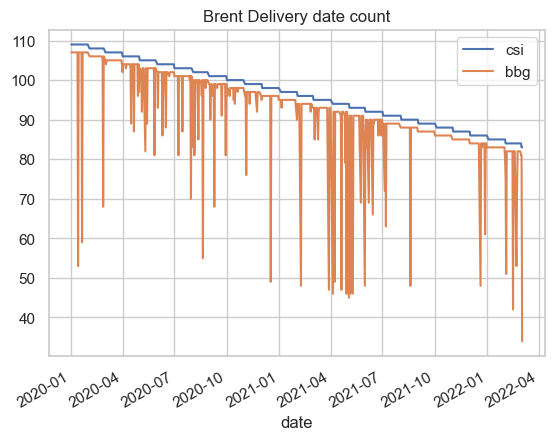

In [115]:
# basic line chart
brent_deli_dates_plot = brent_deli_dates.plot.line(x="date", y=["csi","bbg"])
brent_deli_dates_plot.set_title("Brent Delivery date count")

We see that the number of entries for Bloomberg data varies from a bit less than CSI data to significantly less (drops to below 50)

Let's also analyse missing prices.

In [116]:
union[(union["refName"] == "Brent Crude") & (union["close"].isna())]

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,refName
2128,2020-12-01,2021-01-01,NaN,NaN,NaN,NaN,0.0,0.0,LCO,CSIDATA,IFEU,Brent Crude
19990,2020-12-31,2021-02-01,NaN,NaN,NaN,NaN,0.0,0.0,LCO,CSIDATA,IFEU,Brent Crude
27345,2021-02-01,2021-03-01,NaN,NaN,NaN,NaN,0.0,0.0,LCO,CSIDATA,IFEU,Brent Crude
33865,2021-03-01,2021-04-01,NaN,NaN,NaN,NaN,0.0,0.0,LCO,CSIDATA,IFEU,Brent Crude
36717,2021-07-01,2021-08-01,NaN,NaN,NaN,NaN,0.0,0.0,LCO,CSIDATA,IFEU,Brent Crude
...,...,...,...,...,...,...,...,...,...,...,...,...
105679,2022-02-15,2028-12-01,NaN,NaN,NaN,NaN,NaN,7.0,CO,BBG,IFEU,Brent Crude
105683,2022-02-21,2022-08-01,NaN,NaN,NaN,NaN,30100.0,80232.0,CO,BBG,IFEU,Brent Crude
105690,2022-03-03,2026-12-01,NaN,NaN,NaN,NaN,101.0,NaN,CO,BBG,IFEU,Brent Crude
105703,2022-02-03,2023-06-01,NaN,NaN,NaN,NaN,9266.0,97882.0,CO,BBG,IFEU,Brent Crude


In [117]:
# let's create a table with total both vendors
brent_missing_prices = union[(union["refName"] == "Brent Crude") & (union["close"].isna())].groupby(["date","spec"])["close"].apply(lambda x: x.isna().sum()).reset_index(name ='total')
brent_missing_prices

,date,spec,total
0,2020-01-14,BBG,53
1,2020-01-21,BBG,52
2,2020-01-31,BBG,1
3,2020-02-27,BBG,24
4,2020-03-03,BBG,5
...,...,...,...
96,2022-02-21,BBG,25
97,2022-02-22,BBG,17
98,2022-02-28,BBG,1
99,2022-03-01,CSIDATA,1


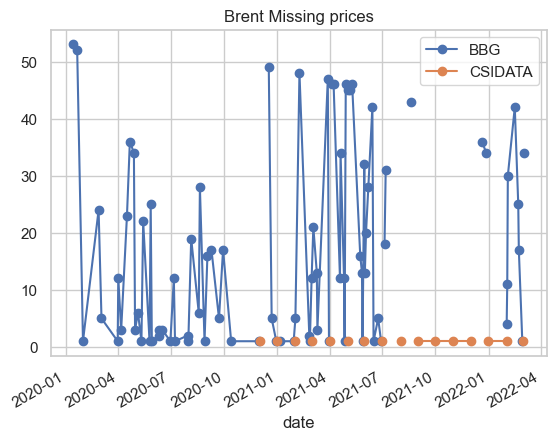

In [118]:
# let's repivot our data and plot using marker="o" setting to highlight missing price entries
brent_missing_prices_pivot = brent_missing_prices.pivot(index="date", columns="spec", values="total")
brent_miss_prices_plot = brent_missing_prices_pivot.plot.line(marker="o")
brent_miss_prices_plot.set_title("Brent Missing prices")
brent_miss_prices_plot.legend().set_title(None)

This plot helps us identify the missing prices for both vendors along the date timeframe.

Bloomberg data looks less complete when it comes to prices.

#### e-mini S&P 500 Index

In [119]:
union[union["refName"] == "e-mini S&P 500 Index"]

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,refName
105713,2021-12-30,2025-12-01,4843.00,4843.00,4843.00,4843.00,0.0,0.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
105714,2021-02-22,2021-09-01,3875.50,3892.50,3840.50,3852.25,52.0,877.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
105715,2021-04-29,2022-06-01,4163.50,4163.50,4163.50,4163.50,0.0,10.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
105716,2021-07-19,2022-12-01,4205.25,4205.25,4205.25,4205.25,25.0,25.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
105717,2021-07-26,2023-06-01,4355.50,4355.50,4355.50,4355.50,0.0,0.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
...,...,...,...,...,...,...,...,...,...,...,...,...
113920,2022-02-03,2022-12-01,4510.00,4510.00,4510.00,4460.75,1.0,7352.0,ES,BBG,XCME,e-mini S&P 500 Index
113921,2022-02-18,2022-09-01,4366.00,4398.00,4315.00,4336.50,213.0,674.0,ES,BBG,XCME,e-mini S&P 500 Index
113922,2022-01-12,2022-06-01,4696.75,4730.50,4689.50,4708.50,582.0,51652.0,ES,BBG,XCME,e-mini S&P 500 Index
113923,2022-02-17,2023-12-01,NaN,NaN,NaN,4413.75,NaN,1038.0,ES,BBG,XCME,e-mini S&P 500 Index


In [120]:
# let's check the observation dates for csi and bbg brent data
csi_es_snp_index_minObsDt == bbg_es_snp_index_minObsDt
csi_es_snp_index_maxObsDt == bbg_es_snp_index_maxObsDt

True

Ok, min/max values match, let's proceed with other checks

In [121]:
set(union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "CSIDATA")]["date"]) == set(union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "BBG")]["date"])

False

Observation dates differ for e-mini S&P 500 Index.

In [122]:
# compare unique obs dates for both CSI and BBG e-mini S&P 500 Index data
print(len(set(union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "CSIDATA")]["date"])))
print(len(set(union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "BBG")]["date"])))

547
562


Looks like BBG has more dates.

In [123]:
# missing CIS obs dates
set(union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "BBG")]["date"]) - set(union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "CSIDATA")]["date"])

{Timestamp('2020-01-20 00:00:00'),
 Timestamp('2020-02-17 00:00:00'),
 Timestamp('2020-05-25 00:00:00'),
 Timestamp('2020-07-03 00:00:00'),
 Timestamp('2020-09-07 00:00:00'),
 Timestamp('2020-11-26 00:00:00'),
 Timestamp('2021-01-18 00:00:00'),
 Timestamp('2021-02-15 00:00:00'),
 Timestamp('2021-04-02 00:00:00'),
 Timestamp('2021-05-31 00:00:00'),
 Timestamp('2021-07-05 00:00:00'),
 Timestamp('2021-09-06 00:00:00'),
 Timestamp('2021-11-25 00:00:00'),
 Timestamp('2022-01-17 00:00:00'),
 Timestamp('2022-02-21 00:00:00')}

In [124]:
# e-mini S&P 500 Index obs dates
csi_es_obs_dates = union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "CSIDATA")].groupby(["date"])["date"].count().reset_index(name ='csi')
bbg_es_obs_dates = union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "BBG")].groupby(["date"])["date"].count().reset_index(name ='bbg')

# let's merge them (not we are using right join as we have more data for bbg but can use outer to have a complete merge)
es_obs_dates = pd.merge(csi_es_obs_dates, bbg_es_obs_dates, on = "date", how = "right")
es_obs_dates

,date,csi,bbg
0,2020-01-02,5.0,5
1,2020-01-03,5.0,5
2,2020-01-06,5.0,5
3,2020-01-07,5.0,5
4,2020-01-08,5.0,5
...,...,...,...
557,2022-02-25,12.0,12
558,2022-02-28,12.0,12
559,2022-03-01,12.0,12
560,2022-03-02,12.0,12


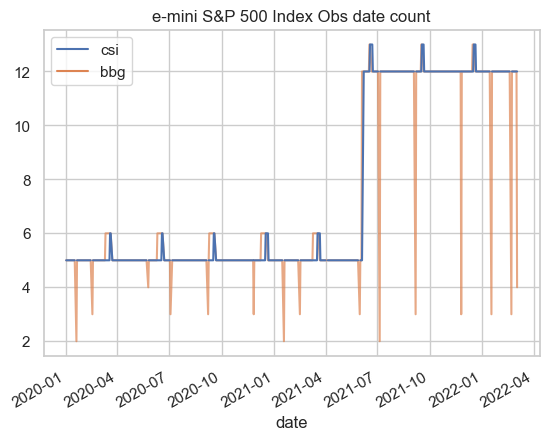

In [125]:
# basic line chart
es_obs_dates_plot = es_obs_dates.plot.line(x="date", y=["csi","bbg"])
es_obs_dates_plot.set_title("e-mini S&P 500 Index Obs date count")

# customise the lines to avoide overlapping
line1, line2 = es_obs_dates_plot.get_lines()
line2.set_zorder(1)
line2.set_alpha(0.7)

Interesting how Blooomberg date column has more unique values, the count of dates shows us the number of delivery dates behind each observation date.

For those 15 dates we don't have in CSI data we see less delivery dates than usual in BBG data.

In [126]:
# delivery dates
set(union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "CSIDATA")]["deliveryDate"]) == set(union[(union["refName"] == "e-mini S&P 500 Index") & (union["spec"] == "BBG")]["deliveryDate"])

True

Delivery date ranges match across CSI and BBG.

Let's check the mising prices

In [127]:
union[(union["refName"] == "e-mini S&P 500 Index") & (union["close"].isna())]

,date,deliveryDate,open,high,low,close,volume,oi,rootCode,spec,mic,refName
105918,2021-06-22,2021-06-01,NaN,NaN,NaN,NaN,0.0,0.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
106279,2021-03-22,2021-03-01,NaN,NaN,NaN,NaN,0.0,0.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
107112,2021-06-21,2021-06-01,NaN,NaN,NaN,NaN,0.0,73.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
107150,2021-12-20,2021-12-01,NaN,NaN,NaN,NaN,0.0,0.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
107712,2021-09-20,2021-09-01,NaN,NaN,NaN,NaN,0.0,0.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
108142,2020-12-21,2020-12-01,NaN,NaN,NaN,NaN,0.0,0.0,ES,CSIDATA,XCME,e-mini S&P 500 Index
109992,2021-02-15,2021-06-01,NaN,NaN,NaN,NaN,826.0,NaN,ES,BBG,XCME,e-mini S&P 500 Index
110084,2021-07-05,2021-09-01,NaN,NaN,NaN,NaN,87524.0,NaN,ES,BBG,XCME,e-mini S&P 500 Index
110096,2021-07-05,2021-12-01,NaN,NaN,NaN,NaN,79.0,NaN,ES,BBG,XCME,e-mini S&P 500 Index
110274,2021-09-17,2021-09-01,NaN,NaN,NaN,NaN,24139.0,NaN,ES,BBG,XCME,e-mini S&P 500 Index


In [128]:
# let's create a table with total both vendors
es_missing_prices = union[(union["refName"] == "e-mini S&P 500 Index") & (union["close"].isna())].groupby(["date","spec"])["close"].apply(lambda x: x.isna().sum()).reset_index(name ='total')
es_missing_prices

,date,spec,total
0,2020-01-20,BBG,2
1,2020-02-17,BBG,3
2,2020-03-20,BBG,1
3,2020-05-25,BBG,4
4,2020-06-19,BBG,1
5,2020-07-03,BBG,3
6,2020-09-07,BBG,3
7,2020-09-18,BBG,1
8,2020-11-26,BBG,3
9,2020-12-18,BBG,1


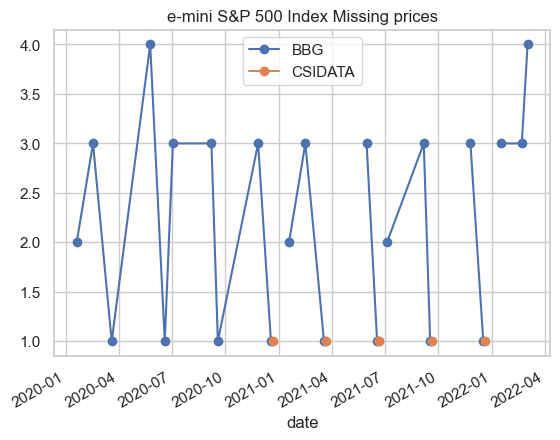

In [129]:
# let's repivot our data and plot using marker="o" setting to highlight missing price entries
es_missing_prices_pivot = es_missing_prices.pivot(index="date", columns="spec", values="total")
es_miss_prices_plot = es_missing_prices_pivot.plot.line(marker="o")
es_miss_prices_plot.set_title("e-mini S&P 500 Index Missing prices")
es_miss_prices_plot.legend().set_title(None)

### Potential recommendations and/or next steps.

Let's compile all our findings from the master dataset. 

For **Brent** we had an inconsistency in delivery dates.

Text(0.5, 1.0, 'Brent Delivery date count')

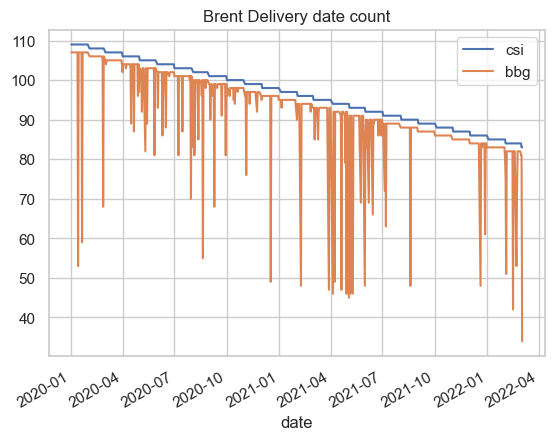

In [130]:
brent_deli_dates_plot = brent_deli_dates.plot.line(x="date", y=["csi","bbg"])
brent_deli_dates_plot.set_title("Brent Delivery date count")

And missing prices.

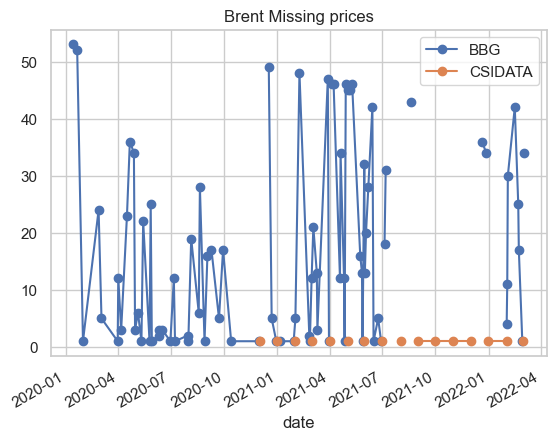

In [131]:
brent_miss_prices_plot = brent_missing_prices_pivot.plot.line(marker="o")
brent_miss_prices_plot.set_title("Brent Missing prices")
brent_miss_prices_plot.legend().set_title(None)

For **e-mini S&P 500 Index** we had different observation date ranges for CSI and BBG.

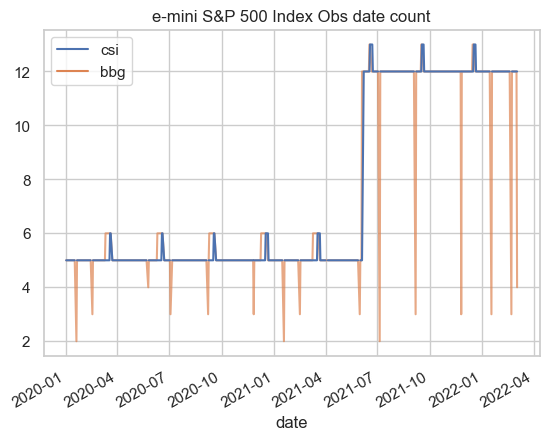

In [132]:
es_obs_dates_plot = es_obs_dates.plot.line(x="date", y=["csi","bbg"])
es_obs_dates_plot.set_title("e-mini S&P 500 Index Obs date count")

# customise the lines to avoide overlapping
line1, line2 = es_obs_dates_plot.get_lines()
line2.set_zorder(1)
line2.set_alpha(0.7)

And missing prices

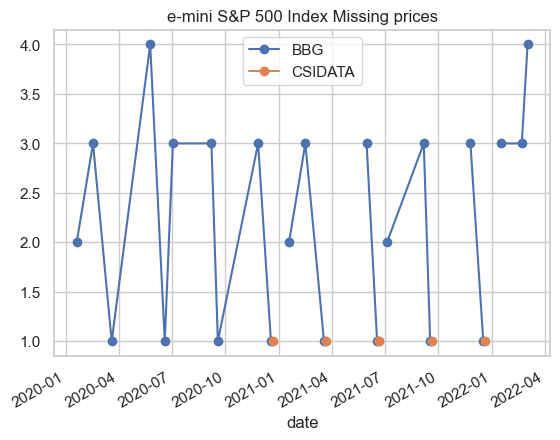

In [133]:
es_missing_prices_pivot = es_missing_prices.pivot(index="date", columns="spec", values="total")
es_miss_prices_plot = es_missing_prices_pivot.plot.line(marker="o")
es_miss_prices_plot.set_title("e-mini S&P 500 Index Missing prices")
es_miss_prices_plot.legend().set_title(None)

**Key ideas/solutions on the above issues**:
- **Date (observation date)**: In order to tackle missing entries it would be worth to cross reference with the ICE Exchange (or any other, CME, etc) calendar first to eliminate any holiday days. This will help to identify dates for which there should be data coming from vendors. Following this, vendor source/upstream data could be investigated as it might be incomplete.
- **Delivery date**: This can also be reconciled with the exchange in order to identify to right number of delivery entries for each underlying asset and its observation date
- **Price analysis**: missing (NaN) values across 4 price columns between 2 vendors. Clarify the reasons behind missing prices, at what stage are lost and for what reason (upstream data feed failures on the vendors side, etc).


Additional ideas/steps:
- **Deeper price data reconciliation** for 2 vendors data, ie mismatches, deviations, etc.
- **OI/volume** data analysis & checks.

### Quality assurance steps that can help catch any erroneous data being delivered by Bloomberg and CSI on an ongoing daily basis.

**Quality assurance pipeline suggestions for Bloomberg and CSIData**

- **Initial Data Validation & Execution Check**:
  As a first step, it would be beneficial to implement a validation process to determine whether the vendor data feed should run each day. This check
  should align with the working calendar, ensuring execution only on business days while accounting for exchange closures. Integrating a calendar
  functionality would help automate this decision. Additionally, a notification mechanism should be in place to confirm when the feed has run
  successfully and, more importantly, to alert if the feed was expected to run (i.e., on a working day) but did not.

- **Delivery Date Coverage & Verification**:
  A comprehensive dataset of delivery dates should be maintained for each day, including all delivery months and years as per exchange rules. A
  verification process must be implemented to ensure all required delivery data is accurately captured from vendors.

- **Price Data Integrity & Monitoring**:
  Price data must not be missing or contain zero values (negative prices are acceptable for spreads and should be retained). Any missing or zero price
  values should be logged and monitored, triggering a validation process with upstream data sources/vendors to investigate and resolve potential
  discrepancies.

- **Data Volume & Quality Tracking**:
  Alongside the above checks, the system should log the volume of ingested data (row count) along with minimum and maximum date values and timestamps.
  This data could be stored in a dedicated table, enabling easy access and integration with a dashboard featuring red/green indicators to provide a
  quick overview of pipeline and data health.